########################################################################################################
############################## -- Machine Learning for Data Science --##################################
########################################################################################################

Autor: Luis Gerardo Lucas Morales

Fecha:22-10-2020

# Guia de Modelamiento

## Librerias

In [1]:
#Importar las librerías necesarias en Python.
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np 
from scipy import stats 
import pandas as pd 
import seaborn as sns 
import matplotlib as plt

In [2]:
# Leer el dataset en un dataframe usando pandas
train = pd.read_csv("data/train.csv",sep=';') 

In [3]:
#Leer los primeros registros.
sns.set(style='darkgrid')
train.head(10) # Puedes visualizar la cantidad de registro que requieras

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


## EDO

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
# Viendo las variables por tipo de datos
tipos = train.columns.to_series().groupby(train.dtypes).groups
tipos

{dtype('int64'): Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object'),
 dtype('O'): Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
        'month', 'poutcome', 'y'],
       dtype='object')}

### Valores perdidos Missing

In [6]:
# Revisar los valores perdidos
#Creamos una función:
def num_missing(x):
  return sum(x.isnull())

#Aplicamos por columna:
print ("Valores perdidos por columna")
print (train.apply(num_missing, axis=0)) 

Valores perdidos por columna
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [7]:
to_keep_columns=['age', 'balance', 'day', 'duration', 'campaign', 
                 'pdays', 'previous','job', 'marital', 'education',
                 'default', 'housing', 'loan', 'contact','month', 'poutcome', 'y']

In [8]:
num_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

## Cofidificar valores categoricos

In [9]:
obj_train = train.select_dtypes(include=['object']).copy()
obj_train.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


In [10]:
## verificar si hay valores nulos
obj_train[obj_train.isnull().any(axis=1)]

,job,marital,education,default,housing,loan,contact,month,poutcome,y


### Enfoque1 buscar y reemplzar.

In [11]:
obj_train["education"].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [12]:
clean_num={'marital':{'married':1,'single':2,'divorced':3},
           
          'education':{'unknown':1,'primary':2,'tertiary':3,'secondary':4}}

In [13]:
obj_train.replace(clean_num,inplace=True)
obj_train.head(5)

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,1,3,no,yes,no,unknown,may,unknown,no
1,technician,2,4,no,yes,no,unknown,may,unknown,no
2,entrepreneur,1,4,no,yes,yes,unknown,may,unknown,no
3,blue-collar,1,1,no,yes,no,unknown,may,unknown,no
4,unknown,2,1,no,no,no,unknown,may,unknown,no


In [14]:
obj_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   job        45211 non-null  object
 1   marital    45211 non-null  int64 
 2   education  45211 non-null  int64 
 3   default    45211 non-null  object
 4   housing    45211 non-null  object
 5   loan       45211 non-null  object
 6   contact    45211 non-null  object
 7   month      45211 non-null  object
 8   poutcome   45211 non-null  object
 9   y          45211 non-null  object
dtypes: int64(2), object(8)
memory usage: 3.4+ MB


### Codificacion de Etiquetas

In [15]:
obj_train['job']=obj_train['job'].astype('category')
obj_train.dtypes

job          category
marital         int64
education       int64
default        object
housing        object
loan           object
contact        object
month          object
poutcome       object
y              object
dtype: object

In [16]:
obj_train["job_cat"] = obj_train["job"].cat.codes
obj_train.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y,job_cat
0,management,1,3,no,yes,no,unknown,may,unknown,no,4
1,technician,2,4,no,yes,no,unknown,may,unknown,no,9
2,entrepreneur,1,4,no,yes,yes,unknown,may,unknown,no,2
3,blue-collar,1,1,no,yes,no,unknown,may,unknown,no,1
4,unknown,2,1,no,no,no,unknown,may,unknown,no,11


### One Hot Encoding

In [17]:
pd.get_dummies(obj_train, columns=["loan"]).head()

,job,marital,education,default,housing,contact,month,poutcome,y,job_cat,loan_no,loan_yes
0,management,1,3,no,yes,unknown,may,unknown,no,4,1,0
1,technician,2,4,no,yes,unknown,may,unknown,no,9,1,0
2,entrepreneur,1,4,no,yes,unknown,may,unknown,no,2,0,1
3,blue-collar,1,1,no,yes,unknown,may,unknown,no,1,1,0
4,unknown,2,1,no,no,unknown,may,unknown,no,11,1,0


Esta función es poderosa porque puede pasar tantas columnas de categoría como desee y elegir cómo etiquetar las columnas usando prefix . Un nombre adecuado facilitará un poco el resto del análisis.

In [18]:
pd.get_dummies(obj_train, columns=["job", "housing"], prefix=["empleo", "housi"]).head()

,marital,education,default,loan,contact,month,poutcome,y,job_cat,empleo_admin.,...,empleo_management,empleo_retired,empleo_self-employed,empleo_services,empleo_student,empleo_technician,empleo_unemployed,empleo_unknown,housi_no,housi_yes
0,1,3,no,no,unknown,may,unknown,no,4,0,...,1,0,0,0,0,0,0,0,0,1
1,2,4,no,no,unknown,may,unknown,no,9,0,...,0,0,0,0,0,1,0,0,0,1
2,1,4,no,yes,unknown,may,unknown,no,2,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1,no,no,unknown,may,unknown,no,1,0,...,0,0,0,0,0,0,0,0,0,1
4,2,1,no,no,unknown,may,unknown,no,11,0,...,0,0,0,0,0,0,0,1,1,0


In [19]:
obj_train.head(5)

,job,marital,education,default,housing,loan,contact,month,poutcome,y,job_cat
0,management,1,3,no,yes,no,unknown,may,unknown,no,4
1,technician,2,4,no,yes,no,unknown,may,unknown,no,9
2,entrepreneur,1,4,no,yes,yes,unknown,may,unknown,no,2
3,blue-collar,1,1,no,yes,no,unknown,may,unknown,no,1
4,unknown,2,1,no,no,no,unknown,may,unknown,no,11


### Codificacion binaria personalizada

<img src="data/numpywhere.png" width="450" height="150" >

In [20]:
obj_train["job"].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [21]:
obj_train["management_Code"] = np.where(obj_train["job"].str.contains("management"), 1,0)

In [22]:
obj_train.head(5)

,job,marital,education,default,housing,loan,contact,month,poutcome,y,job_cat,management_Code
0,management,1,3,no,yes,no,unknown,may,unknown,no,4,1
1,technician,2,4,no,yes,no,unknown,may,unknown,no,9,0
2,entrepreneur,1,4,no,yes,yes,unknown,may,unknown,no,2,0
3,blue-collar,1,1,no,yes,no,unknown,may,unknown,no,1,0
4,unknown,2,1,no,no,no,unknown,may,unknown,no,11,0


### Scikit-Learn

In [23]:
obj_train["poutcome"].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [24]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
obj_train["job_code"] = lb_make.fit_transform(obj_train["job"])
obj_train.head(5)

,job,marital,education,default,housing,loan,contact,month,poutcome,y,job_cat,management_Code,job_code
0,management,1,3,no,yes,no,unknown,may,unknown,no,4,1,4
1,technician,2,4,no,yes,no,unknown,may,unknown,no,9,0,9
2,entrepreneur,1,4,no,yes,yes,unknown,may,unknown,no,2,0,2
3,blue-collar,1,1,no,yes,no,unknown,may,unknown,no,1,0,1
4,unknown,2,1,no,no,no,unknown,may,unknown,no,11,0,11


In [25]:
obj_train[["job", "job_code"]].head(20)


,job,job_code
0,management,4
1,technician,9
2,entrepreneur,2
3,blue-collar,1
4,unknown,11
5,management,4
6,management,4
7,entrepreneur,2
8,retired,5
9,technician,9


In [26]:
train.head(10) 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


## Analisis Bivariado

In [27]:
my_tab = pd.crosstab(train.y,train.marital,margins = True)
my_tab

marital,divorced,married,single,All
y,,,,
no,4585,24459,10878,39922
yes,622,2755,1912,5289
All,5207,27214,12790,45211


In [28]:
#Assigns the frequency values
nocount = my_tab.iloc[0][0:3].values
yescount = my_tab.iloc[1][0:3].values


### Prueba chi cuadrado

In [29]:
from scipy import stats
f_obs = np.array([my_tab.iloc[0][0:3].values,
                  my_tab.iloc[1][0:3].values])
stats.chi2_contingency(f_obs)[0:3]

(196.4959456560396, 2.1450999986791486e-43, 2)

Con un valor de p <0.05, podemos rechazar la hipótesis nula. Definitivamente existe algún tipo de relación entre 'marital' y la columna de 'y'. No sabemos cuál es esta relación, pero sabemos que estas dos variables no son independientes entre sí.

## Seleccion de variables

In [30]:
columns=['age', 'balance', 'duration', 'campaign', 
                 'previous','job', 'marital', 'education',
                 'default', 'housing', 'loan', 'contact', 'poutcome', 'y']

In [31]:
trains=train[columns]
trains.head()

,age,balance,duration,campaign,previous,job,marital,education,default,housing,loan,contact,poutcome,y
0,58,2143,261,1,0,management,married,tertiary,no,yes,no,unknown,unknown,no
1,44,29,151,1,0,technician,single,secondary,no,yes,no,unknown,unknown,no
2,33,2,76,1,0,entrepreneur,married,secondary,no,yes,yes,unknown,unknown,no
3,47,1506,92,1,0,blue-collar,married,unknown,no,yes,no,unknown,unknown,no
4,33,1,198,1,0,unknown,single,unknown,no,no,no,unknown,unknown,no


In [32]:
trains["contact"].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [33]:
#from sklearn.preprocessing import LabelEncoder
trains['y'] = trains['y'].replace({'no': 0,'yes': 1})
#lb_make = LabelEncoder()
#trains["job_code"] = lb_make.fit_transform(trains["job"])

trains['job']=trains['job'].replace({'admin.': 0,'blue-collar': 1,'entrepreneur': 2,
                                           'housemaid.': 3,'management': 4,'retired': 5,
                                           'self-employed': 6,'services': 7,'student': 8,
                                           'technician': 9,'unemployed': 10,'unknown': 11})
trains['marital'] = trains['marital'].replace({'married': 0,'single': 1,'divorced': 2})
trains['education'] = trains['education'].replace({'unknown': 0,'primary': 1,'tertiary': 2,'secondary': 3})
trains['default'] = trains['default'].replace({'no': 0,'yes': 1})
trains['housing'] = trains['housing'].replace({'no': 0,'yes': 1})
trains['loan'] = trains['loan'].replace({'no': 0,'yes': 1})
trains['contact'] = trains['contact'].replace({'unknown': 0,'cellular': 1,'telephone':3})
#trains["contact_code"] = np.where(trains["contact"].str.contains("unknown"), 0,1)
trains['poutcome'] = trains['poutcome'].replace({'unknown': 0,'failure': 1,'other': 2,'success': 3})
trains.head(5)

C:\Users\Lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\Lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

,age,balance,duration,campaign,previous,job,marital,education,default,housing,loan,contact,poutcome,y
0,58,2143,261,1,0,4,0,2,0,1,0,0,0,0
1,44,29,151,1,0,9,1,3,0,1,0,0,0,0
2,33,2,76,1,0,2,0,3,0,1,1,0,0,0
3,47,1506,92,1,0,1,0,0,0,1,0,0,0,0
4,33,1,198,1,0,11,1,0,0,0,0,0,0,0


In [34]:
trains.head(5)

,age,balance,duration,campaign,previous,job,marital,education,default,housing,loan,contact,poutcome,y
0,58,2143,261,1,0,4,0,2,0,1,0,0,0,0
1,44,29,151,1,0,9,1,3,0,1,0,0,0,0
2,33,2,76,1,0,2,0,3,0,1,1,0,0,0
3,47,1506,92,1,0,1,0,0,0,1,0,0,0,0
4,33,1,198,1,0,11,1,0,0,0,0,0,0,0


In [35]:
test = pd.read_csv("data/test.csv",sep=';') 
test.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [36]:
dftest=test[columns]
dftest.head()

,age,balance,duration,campaign,previous,job,marital,education,default,housing,loan,contact,poutcome,y
0,30,1787,79,1,0,unemployed,married,primary,no,no,no,cellular,unknown,no
1,33,4789,220,1,4,services,married,secondary,no,yes,yes,cellular,failure,no
2,35,1350,185,1,1,management,single,tertiary,no,yes,no,cellular,failure,no
3,30,1476,199,4,0,management,married,tertiary,no,yes,yes,unknown,unknown,no
4,59,0,226,1,0,blue-collar,married,secondary,no,yes,no,unknown,unknown,no


In [37]:
dftest['y'] = dftest['y'].replace({'no': 0,'yes': 1})
#lb_make = LabelEncoder()
#trains["job_code"] = lb_make.fit_transform(trains["job"])

dftest['job']=dftest['job'].replace({'admin.': 0,'blue-collar': 1,'entrepreneur': 2,
                                           'housemaid.': 3,'management': 4,'retired': 5,
                                           'self-employed': 6,'services': 7,'student': 8,
                                           'technician': 9,'unemployed': 10,'unknown': 11})
dftest['marital'] = dftest['marital'].replace({'married': 0,'single': 1,'divorced': 2})
dftest['education'] = dftest['education'].replace({'unknown': 0,'primary': 1,'tertiary': 2,'secondary': 3})
dftest['default'] = dftest['default'].replace({'no': 0,'yes': 1})
dftest['housing'] = dftest['housing'].replace({'no': 0,'yes': 1})
dftest['loan'] = dftest['loan'].replace({'no': 0,'yes': 1})
dftest['contact'] = dftest['contact'].replace({'unknown': 0,'cellular': 1,'telephone':3})
#trains["contact_code"] = np.where(trains["contact"].str.contains("unknown"), 0,1)
dftest['poutcome'] = dftest['poutcome'].replace({'unknown': 0,'failure': 1,'other': 2,'success': 3})
dftest.head(5)

C:\Users\Lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

,age,balance,duration,campaign,previous,job,marital,education,default,housing,loan,contact,poutcome,y
0,30,1787,79,1,0,10,0,1,0,0,0,1,0,0
1,33,4789,220,1,4,7,0,3,0,1,1,1,1,0
2,35,1350,185,1,1,4,1,2,0,1,0,1,1,0
3,30,1476,199,4,0,4,0,2,0,1,1,0,0,0
4,59,0,226,1,0,1,0,3,0,1,0,0,0,0


## Modelamiento


### Balance de target

Clase 0: 39922
Clase 1: 5289
Proportion Clase 0: 0.88 : 0
Proportion Clase 1: 0.12 : 1


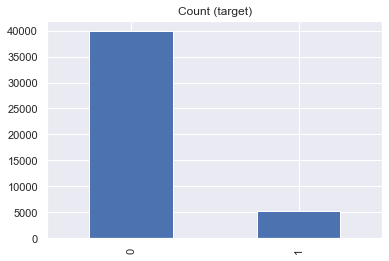

In [38]:
##train_parametrica
import numpy as np
import pandas as pd
import seaborn as sns
target_count = trains.y.value_counts()
print('Clase 0:', target_count[0])
print('Clase 1:', target_count[1])
print('Proportion Clase 0:', round(target_count[0] / (target_count[0]+target_count[1]), 2), ': 0')
print('Proportion Clase 1:', round(target_count[1] / (target_count[0]+target_count[1]), 2), ': 1')
target_count.plot(kind='bar', title='Count (target)');

### Imputación OverSampling: SMOTE

In [39]:
# Creamos nuestra matriz de datos o variables independientes y 
# nuestro vector columna con la variable independiente
#train_parametrica = train_parametrica.drop('Loan_ID', axis=1)
X, y = trains.drop('y', axis=1), trains['y']

In [43]:
import imblearn
import imblearn; imblearn.show_versions(github=True)

<details><summary>System, Dependency Information</summary>

**System Information**

* python    : `3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]`
* executable: `C:\Users\Lenovo\anaconda3\python.exe`
* machine   : `Windows-10-10.0.18362-SP0`

**Python Dependencies**

* pip       : `20.0.2`
* setuptools: `45.2.0.post20200210`
* imblearn  : `0.7.0`
* sklearn   : `0.22.1`
* numpy     : `1.18.1`
* scipy     : `1.4.1`
* Cython    : `0.29.15`
* pandas    : `1.0.1`
* keras     : `None`
* tensorflow: `None`
* joblib    : `0.14.1`

</details>


In [44]:
import numpy as np
import pandas as pd
from imblearn.under_sampling import TomekLinks

tl = TomekLinks()
X_tl, y_tl,id_tl  = tl.fit_sample(X, y)

# Tenemos identificados los nombres de las columnas para el dataframe
columns_X = ['age','balance','duration','campaign','previous','job','marital','education',
             'default','housing','loan','contact','poutcome']
columns_y = ['y']


df_X_tl = pd.DataFrame(data=X_tl,columns=columns_X)
df_y_tl = pd.DataFrame(data=y_tl,columns=columns_y)

# Concatenamos la información
df_balanceado_tl = pd.concat([df_X_tl, df_y_tl], axis=1)

AttributeError: 'TomekLinks' object has no attribute '_validate_data'